In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel('AirBNB_Holland_Belgium.xlsx')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21371 entries, 0 to 21370
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21371 non-null  int64  
 1   name                            21337 non-null  object 
 2   host_id                         21371 non-null  int64  
 3   country                         21371 non-null  int64  
 4   neighbourhood                   21371 non-null  object 
 5   latitude                        21371 non-null  int64  
 6   longitude                       21371 non-null  int64  
 7   room_type                       21371 non-null  object 
 8   price                           21371 non-null  int64  
 9   minimum_nights                  21371 non-null  int64  
 10  number_of_reviews               21371 non-null  int64  
 11  reviews_per_month               18600 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
print(df.shape)

(21371, 14)


In [ ]:
df['reviews_per_month'] = df['reviews_per_month'].fillna(0)

In [ ]:
df['reviews_per_month'].isnull().sum()

0

In [ ]:
df['name'] = df['name'].fillna('unknown')

In [ ]:
df.isnull().sum()

,0
id,0
name,0
host_id,0
country,0
neighbourhood,0
latitude,0
longitude,0
room_type,0
price,0
minimum_nights,0


In [ ]:
df.head()

,id,name,host_id,country,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,1,Oostelijk Havengebied - Indische Buurt,5236575,494142,Private room,59,3,278,200.0,1,125
1,20168,Studio with private bathroom in the centre 1,59484,1,Centrum-Oost,5236509,489354,Private room,209,1,340,267.0,3,3
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,1,Centrum-West,5237297,488339,Entire home/apt,125,14,5,16.0,1,188
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,1,Centrum-West,5238761,489188,Private room,135,2,219,209.0,1,183
4,28871,Comfortable double room,124245,1,Centrum-West,5236719,489092,Private room,75,2,334,274.0,2,348


In [ ]:
def add_decimal(longitude):
  """Adds a decimal point after the second digit of a longitude value."""
  longitude_str = str(longitude)
  if len(longitude_str) > 1:
    return longitude_str[:1] + '.' + longitude_str[1:]
  else:
    return longitude_str

df['longitude'] = df['longitude'].apply(add_decimal)
print(df['longitude'].head())


0    4.94142
1    4.89354
2    4.88339
3    4.89188
4    4.89092
Name: longitude, dtype: object


In [ ]:
def add_decimal(latitude):
  """Adds a decimal point after the second digit of a longitude value."""
  latitude_str = str(latitude)
  if len(latitude_str) > 2:
    return latitude_str[:2] + '.' + latitude_str[2:]
  else:
    return latitude_str

df['latitude'] = df['latitude'].apply(add_decimal)
print(df['latitude'].head())


0    52.36575
1    52.36509
2    52.37297
3    52.38761
4    52.36719
Name: latitude, dtype: object


In [ ]:

print(df['room_type'].unique())


['Private room' 'Entire home/apt' 'Hotel room' 'Shared room']


In [ ]:
def convert_room_type(room_type):
  if room_type == 'Private room':
    return 0
  elif room_type == 'Entire home/apt':
    return 1
  elif room_type == 'Hotel room':
    return 3
  elif room_type == 'Shared room':
    return 4
  else:
    return None  # Handle any unexpected values

df['dummy_room_type'] = df['room_type'].apply(convert_room_type)


In [ ]:
df.head()

,id,name,host_id,country,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dummy_room_type
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,1,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,200.0,1,125,0
1,20168,Studio with private bathroom in the centre 1,59484,1,Centrum-Oost,52.36509,4.89354,Private room,209,1,340,267.0,3,3,0
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,1,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,16.0,1,188,1
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,1,Centrum-West,52.38761,4.89188,Private room,135,2,219,209.0,1,183,0
4,28871,Comfortable double room,124245,1,Centrum-West,52.36719,4.89092,Private room,75,2,334,274.0,2,348,0


In [ ]:
df['minimum_spending_required'] = df['price'] * df['minimum_nights']
df.head()


,id,name,host_id,country,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,dummy_room_type,minimum_spending_required
0,2818,Quiet Garden View Room & Super Fast WiFi,3159,1,Oostelijk Havengebied - Indische Buurt,52.36575,4.94142,Private room,59,3,278,200.0,1,125,0,177
1,20168,Studio with private bathroom in the centre 1,59484,1,Centrum-Oost,52.36509,4.89354,Private room,209,1,340,267.0,3,3,0,209
2,25428,Lovely apt in City Centre (w.lift) near Jordaan,56142,1,Centrum-West,52.37297,4.88339,Entire home/apt,125,14,5,16.0,1,188,1,1750
3,27886,"Romantic, stylish B&B houseboat in canal district",97647,1,Centrum-West,52.38761,4.89188,Private room,135,2,219,209.0,1,183,0,270
4,28871,Comfortable double room,124245,1,Centrum-West,52.36719,4.89092,Private room,75,2,334,274.0,2,348,0,150


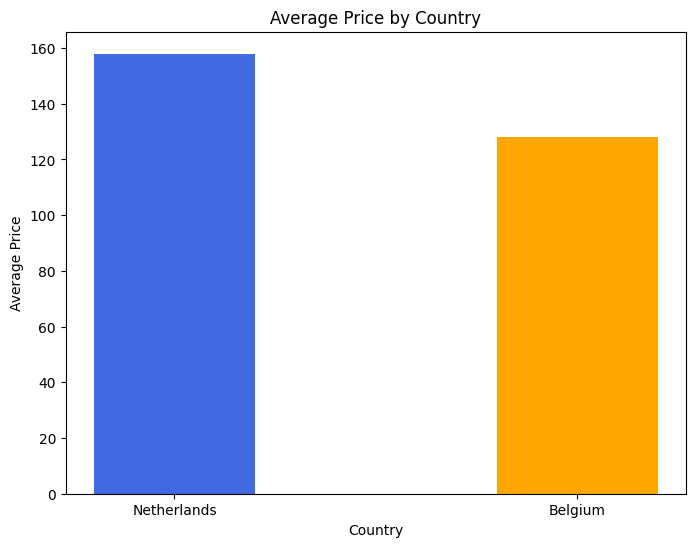

In [ ]:

import matplotlib.pyplot as plt

# Assuming 'country_code' column exists in your DataFrame and represents the country (1 for Netherlands, 2 for Belgium)
# If not, you'll need to create or adjust this column accordingly.

# Group by country and calculate the average price
average_price_by_country = df.groupby('country')['price'].mean()

# Create a bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size as needed
plt.bar(average_price_by_country.index, average_price_by_country.values, color=['royalblue', 'orange'], width=0.4)  # Customize colors and bar width

# Add labels and title
plt.xlabel('Country')
plt.ylabel('Average Price')
plt.title('Average Price by Country')

# Customize x-axis ticks to display country names
plt.xticks([1, 2], ['Netherlands', 'Belgium'])

# Show the plot
plt.show()


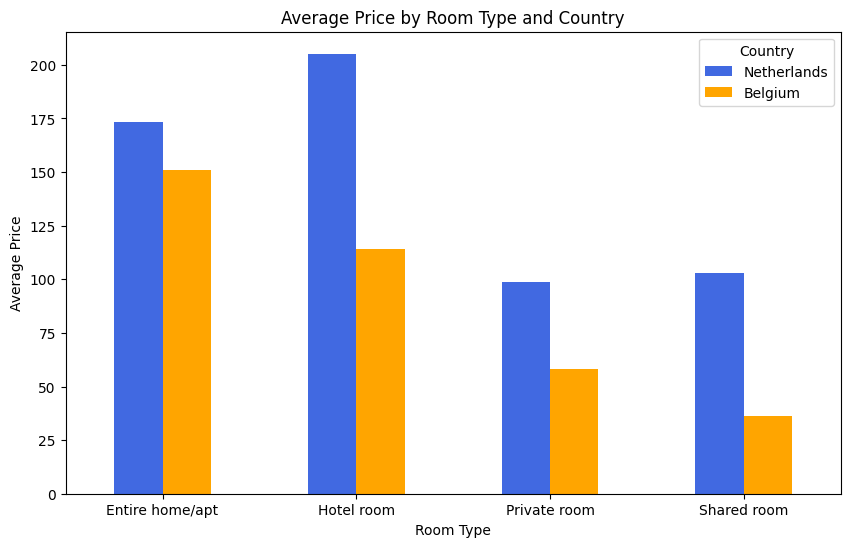

In [ ]:
import matplotlib.pyplot as plt

# Group by room type and country, then calculate the average price
average_price_by_room_type_and_country = df.groupby(['room_type', 'country'])['price'].mean().unstack()

# Create a bar chart
ax = average_price_by_room_type_and_country.plot(kind='bar', figsize=(10, 6), color=['royalblue', 'orange'])

# Customize the chart
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.title('Average Price by Room Type and Country')
plt.xticks(rotation=0)  # Rotate x-axis labels if needed
plt.legend(title='Country', labels=['Netherlands', 'Belgium'])


plt.show()


In [ ]:
df.to_excel('cleaned_data.xlsx', index=False, engine='openpyxl')

In [ ]:
# Assuming your DataFrame is named df
host_activity = df.groupby('host_id').size().reset_index(name='number_of_listings')

# Sort by number of listings in descending order
host_activity = host_activity.sort_values(by='number_of_listings', ascending=False)

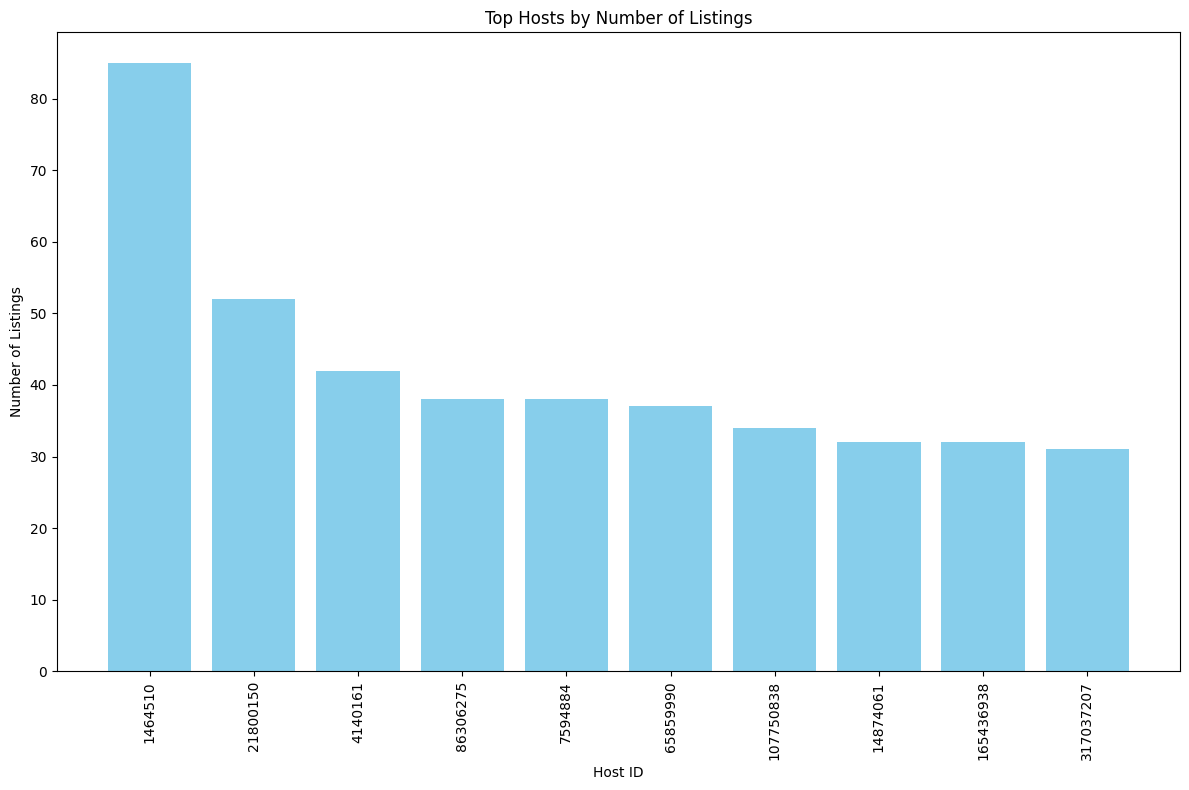

In [ ]:
import matplotlib.pyplot as plt

# Select top hosts for better visibility
top_hosts = host_activity.head(10)

plt.figure(figsize=(12, 8))
plt.bar(top_hosts['host_id'].astype(str), top_hosts['number_of_listings'], color='skyblue')
plt.xlabel('Host ID')
plt.ylabel('Number of Listings')
plt.title('Top Hosts by Number of Listings')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

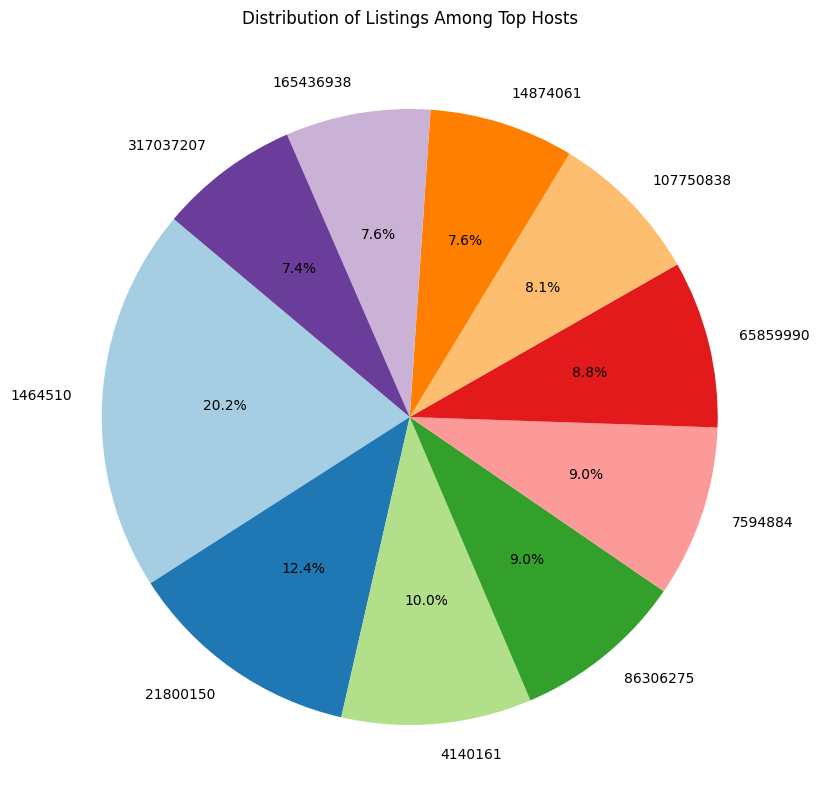

In [ ]:
plt.figure(figsize=(10, 10))

# Select top hosts for pie chart
top_hosts = host_activity.head(10)
plt.pie(top_hosts['number_of_listings'], labels=top_hosts['host_id'].astype(str),
        autopct='%1.1f%%', colors=plt.cm.Paired(range(len(top_hosts))),
        startangle=140)
plt.title('Distribution of Listings Among Top Hosts')
plt.show()

In [ ]:
room_type_counts = df['room_type'].value_counts()

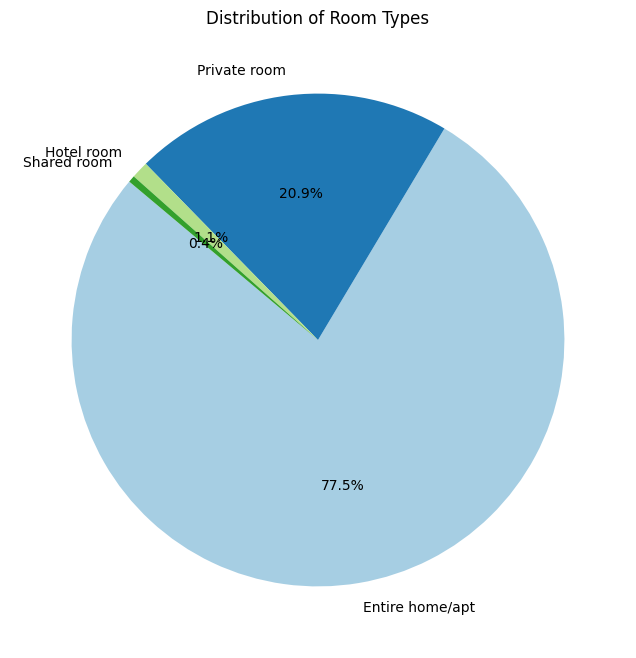

In [ ]:
plt.figure(figsize=(8, 8))
plt.pie(room_type_counts, labels=room_type_counts.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Paired(range(len(room_type_counts))))
plt.title('Distribution of Room Types')
plt.show()

In [ ]:
import plotly.express as px
# Count occurrences of each room type
room_type_counts = df['room_type'].value_counts().reset_index()
room_type_counts.columns = ['room_type', 'count']

# Create the pie chart
fig = px.pie(room_type_counts,
             names='room_type',
             values='count',
             title='Distribution of Room Types',
             color='room_type',
             color_discrete_sequence=px.colors.qualitative.Plotly)

# Show the pie chart
fig.show()

In [ ]:
# Find unique neighborhoods in country 1 (Netherlands)
unique_neighborhoods_country_1 = df[df['country'] == 1]['neighbourhood'].nunique()

# Find unique neighborhoods in country 2 (Belgium)
unique_neighborhoods_country_2 = df[df['country'] == 2]['neighbourhood'].nunique()

print(f"Number of unique neighborhoods in country 1 (Netherlands): {unique_neighborhoods_country_1}")
print(f"Number of unique neighborhoods in country 2 (Belgium): {unique_neighborhoods_country_2}")


Number of unique neighborhoods in country 1 (Netherlands): 22
Number of unique neighborhoods in country 2 (Belgium): 57


In [ ]:
import pandas as pd
import re
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk

# Download NLTK stopwords if not already available
nltk.download('stopwords')
nltk.download('punkt')


# Step 1: Concatenate all unique names into a single string
unique_names = ' '.join(df['name'].unique())

# Step 2: Tokenize the string into words
words = word_tokenize(unique_names.lower())  # Convert to lowercase for case-insensitivity

# Step 3: Remove stopwords and non-alphabetic words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Step 4: Count the frequency of each word
word_counts = Counter(filtered_words)

# Step 5: Get the top 20 most frequent words
top_20_words = word_counts.most_common(30)

# Display the top 20 frequent words
print("Top 20 most frequent words:")
for word, count in top_20_words:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 20 most frequent words:
apartment: 7791
amsterdam: 4201
spacious: 2390
city: 2185
room: 1979
centre: 1854
house: 1714
center: 1686
near: 1651
cosy: 1496
garden: 1450
cozy: 1317
private: 1242
modern: 1187
studio: 1174
bright: 1151
family: 1098
beautiful: 1049
lovely: 1007
view: 973
canal: 971
pijp: 930
apt: 907
central: 890
appartment: 882
light: 864
home: 863
vondelpark: 806
terrace: 787
close: 779


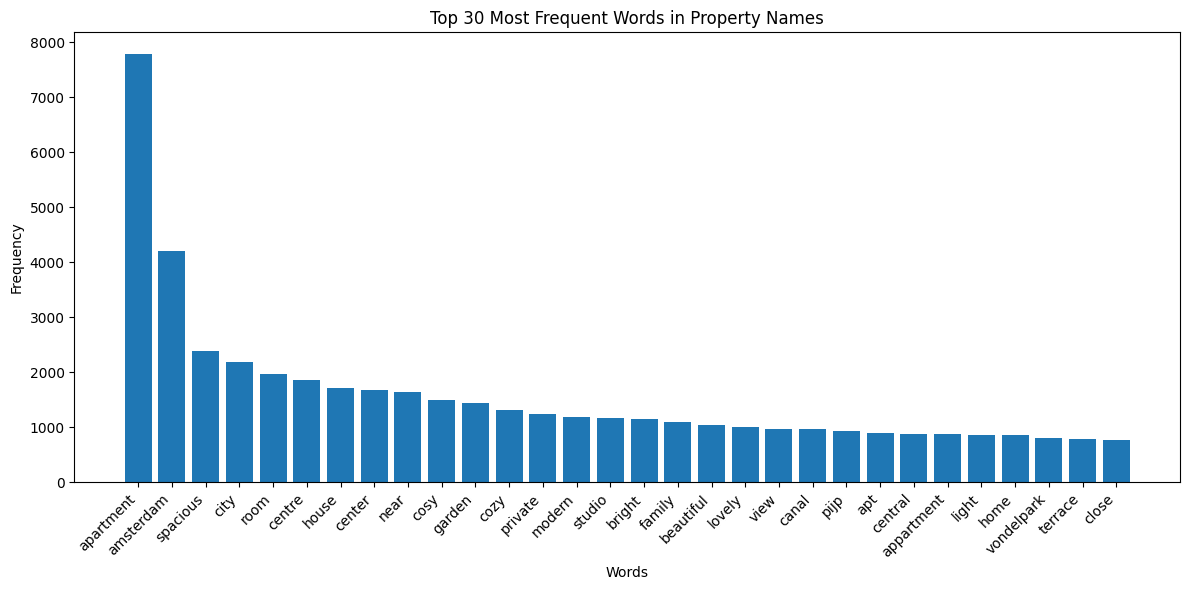

In [ ]:
import matplotlib.pyplot as plt

# Extract words and counts from top_20_words
words = [word for word, count in top_20_words]
counts = [count for word, count in top_20_words]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Frequent Words in Property Names")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top 20 most frequent words:
apartment: 7830
amsterdam: 4209
spacious: 2390
city: 2186
room: 2062
centre: 1854
house: 1714
center: 1686
near: 1651
cosy: 1496
garden: 1458
cozy: 1317
private: 1242
modern: 1187
studio: 1175
family: 1158
bright: 1151
view: 1062
canal: 1059
beautiful: 1049


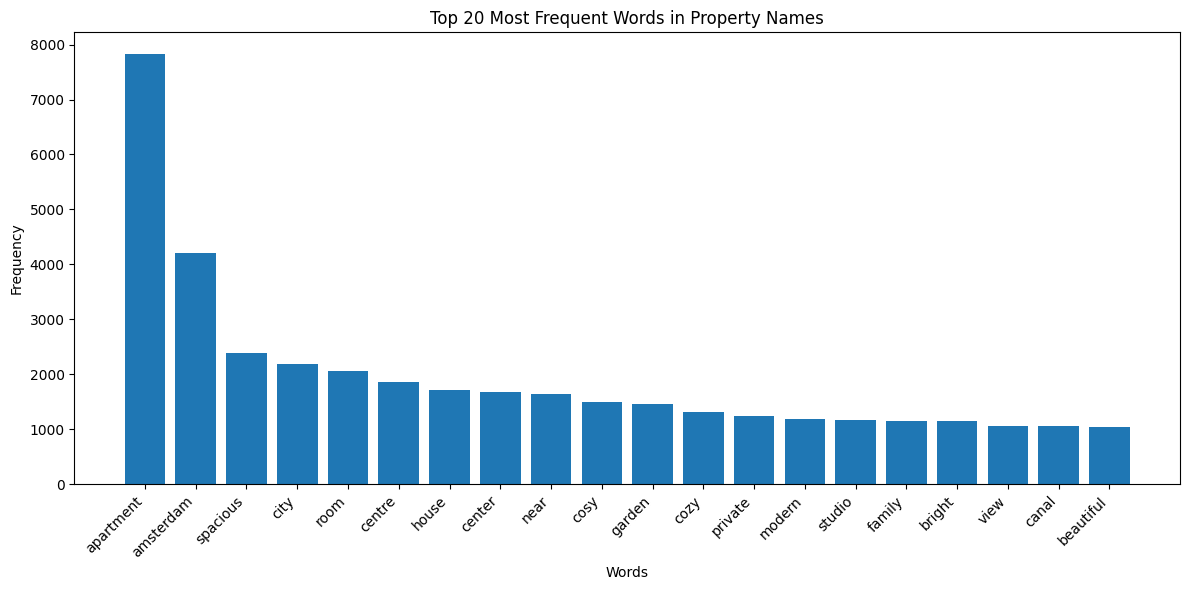

In [ ]:
import matplotlib.pyplot as plt
# Download NLTK stopwords if not already available
nltk.download('stopwords')
nltk.download('punkt')
# Download wordnet
nltk.download('wordnet')


# Step 1: Concatenate all unique names into a single string
unique_names = ' '.join(df['name'].unique())

# Step 2: Tokenize the string into words
words = word_tokenize(unique_names.lower())  # Convert to lowercase for case-insensitivity

# Step 3: Remove stopwords and non-alphabetic words
stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

# Step 4: Apply stemming or lemmatization to reduce words to their root form
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()
stemmed_words = [lemmatizer.lemmatize(word) for word in filtered_words]

# Step 5: Count the frequency of each word
word_counts = Counter(stemmed_words)

# Step 6: Get the top 20 most frequent words
top_20_words = word_counts.most_common(20)

# Display the top 20 frequent words
print("Top 20 most frequent words:")
for word, count in top_20_words:
    print(f"{word}: {count}")



# Extract words and counts from top_20_words
words = [word for word, count in top_20_words]
counts = [count for word, count in top_20_words]

# Create the bar plot
plt.figure(figsize=(12, 6))
plt.bar(words, counts)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 20 Most Frequent Words in Property Names")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [ ]:
# Download NLTK stopwords if not already available
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

def get_top_words(df, country_code):
  """
  Finds the top 20 most frequent words used in property names for a specific country.
  """
  # Filter DataFrame for the specified country
  country_df = df[df['country'] == country_code]

  # Step 1: Concatenate all unique names into a single string
  unique_names = ' '.join(country_df['name'].unique())

  # Step 2: Tokenize the string into words
  words = word_tokenize(unique_names.lower())  # Convert to lowercase for case-insensitivity

  # Step 3: Remove stopwords and non-alphabetic words
  stop_words = set(stopwords.words('english'))
  filtered_words = [word for word in words if word.isalpha() and word not in stop_words]

  # Step 4: Apply lemmatization to reduce words to their root form
  lemmatizer = WordNetLemmatizer()
  stemmed_words = [lemmatizer.lemmatize(word) for word in filtered_words]

  # Step 5: Count the frequency of each word
  word_counts = Counter(stemmed_words)

  # Step 6: Get the top 20 most frequent words
  top_20_words = word_counts.most_common(20)

  return top_20_words


# Find top 20 words for Netherlands (country 1)
top_words_netherlands = get_top_words(df, 1)

# Find top 20 words for Belgium (country 2)
top_words_belgium = get_top_words(df, 2)


print("Top 20 words in Netherlands:")
for word, count in top_words_netherlands:
    print(f"{word}: {count}")

print("\nTop 20 words in Belgium:")
for word, count in top_words_belgium:
    print(f"{word}: {count}")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Top 20 words in Netherlands:
apartment: 7225
amsterdam: 4209
spacious: 2233
city: 1908
room: 1826
centre: 1700
house: 1549
near: 1528
center: 1459
garden: 1404
cosy: 1292
cozy: 1216
private: 1164
family: 1141
modern: 1107
canal: 1059
bright: 1058
studio: 1001
beautiful: 976
lovely: 972

Top 20 words in Belgium:
antwerp: 649
apartment: 610
city: 282
room: 237
center: 230
cosy: 206
studio: 176
house: 166
spacious: 158
centre: 155
antwerpen: 136
central: 135
heart: 133
flat: 130
appartement: 126
near: 125
loft: 119
view: 114
cozy: 102
station: 101


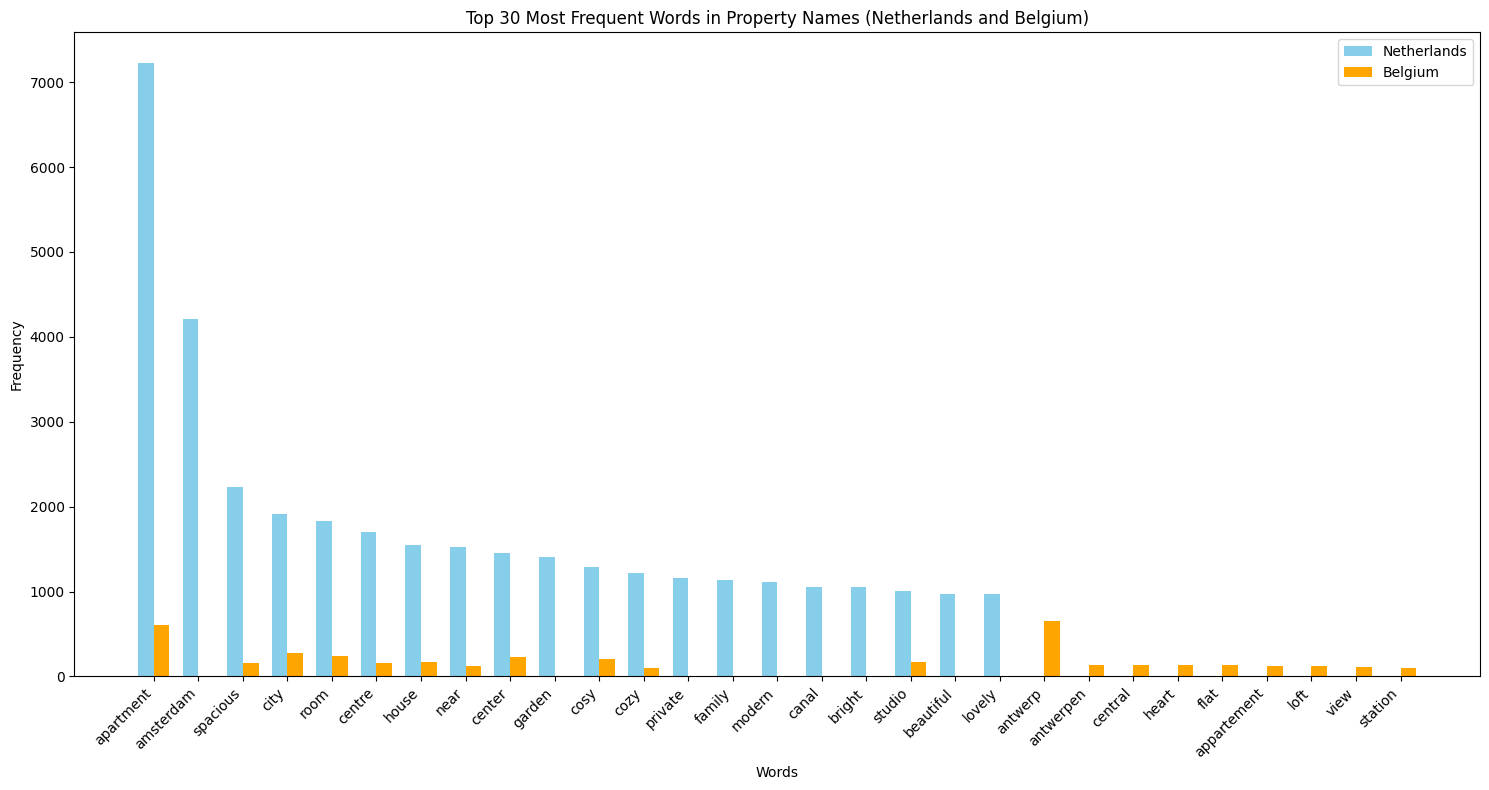

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have top_words_netherlands and top_words_belgium from the previous code

# Combine the top words from both countries into a single dictionary
combined_words = {}
for word, count in top_words_netherlands:
  combined_words[word] = {'Netherlands': count, 'Belgium': 0}

for word, count in top_words_belgium:
  if word in combined_words:
    combined_words[word]['Belgium'] = count
  else:
    combined_words[word] = {'Netherlands': 0, 'Belgium': count}

# Create a list of words and counts for each country
words = list(combined_words.keys())
netherlands_counts = [combined_words[word]['Netherlands'] for word in words]
belgium_counts = [combined_words[word]['Belgium'] for word in words]

# Create the bar plot with shared colors for common words
bar_width = 0.35
index = range(len(words))

plt.figure(figsize=(15, 8))

# Plot bars for Netherlands
plt.bar([x - bar_width / 2 for x in index], netherlands_counts, width=bar_width, label='Netherlands', color='skyblue')

# Plot bars for Belgium
plt.bar([x + bar_width / 2 for x in index], belgium_counts, width=bar_width, label='Belgium', color='orange')

# Set labels and title
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Frequent Words in Property Names (Netherlands and Belgium)")

# Rotate x-axis labels for better readability
plt.xticks(index, words, rotation=45, ha='right')

# Add a legend
plt.legend()

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

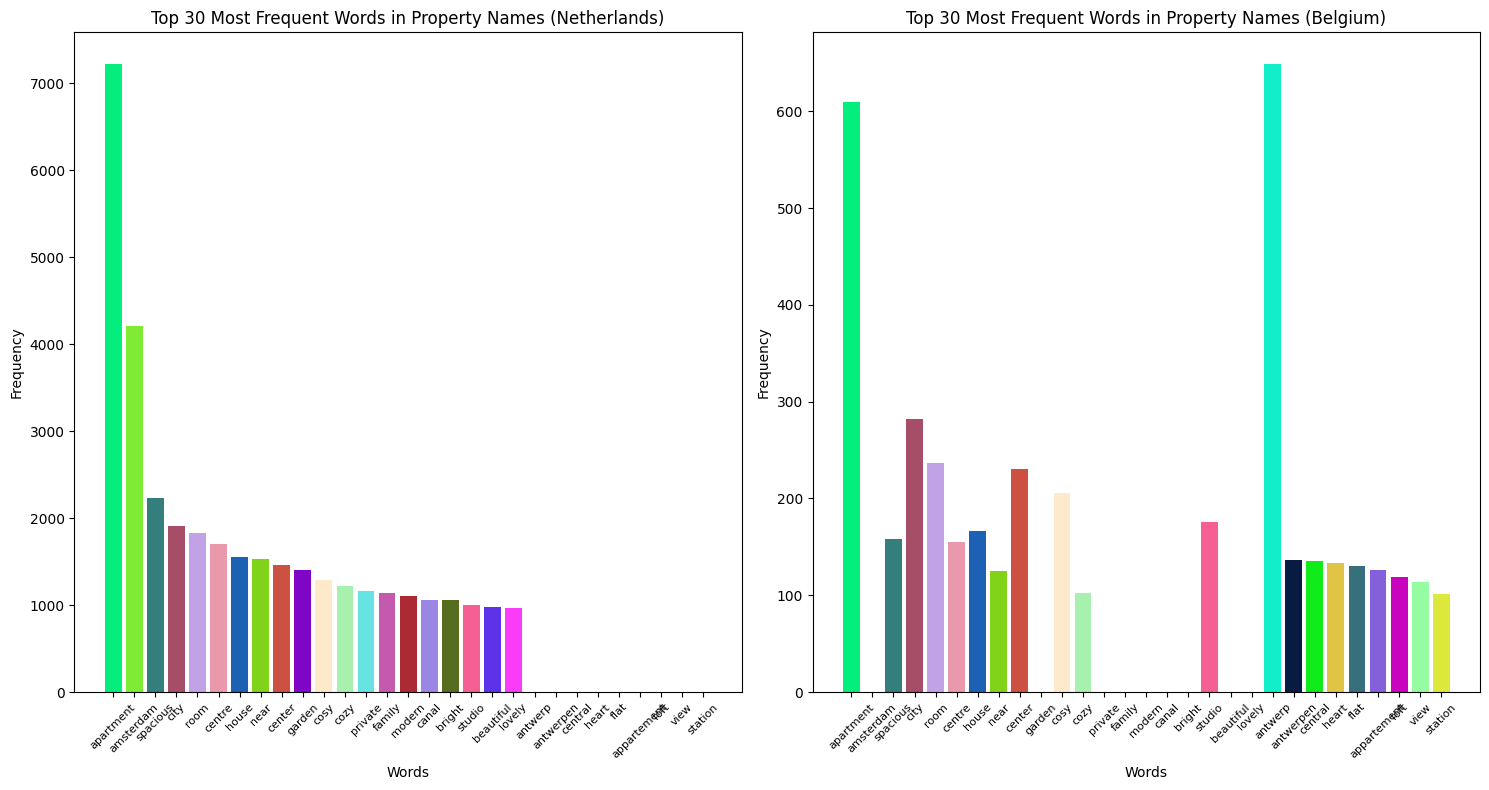

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have top_words_netherlands and top_words_belgium from the previous code

# Combine the top words from both countries into a single dictionary
combined_words = {}
for word, count in top_words_netherlands:
  combined_words[word] = {'Netherlands': count, 'Belgium': 0}

for word, count in top_words_belgium:
  if word in combined_words:
    combined_words[word]['Belgium'] = count
  else:
    combined_words[word] = {'Netherlands': 0, 'Belgium': count}

# Create subplots for Netherlands and Belgium
fig, axes = plt.subplots(1, 2, figsize=(15, 8))

# Create a color map for words
word_colors = {}
for word in combined_words:
  if word not in word_colors:
    word_colors[word] = np.random.rand(3,)  # Assign a random RGB color

# Plot Netherlands
words = list(combined_words.keys())
netherlands_counts = [combined_words[word]['Netherlands'] for word in words]
axes[0].bar(words, netherlands_counts, color=[word_colors[word] for word in words])
axes[0].set_title("Top 30 Most Frequent Words in Property Names (Netherlands)")
axes[0].set_xlabel("Words")
axes[0].set_ylabel("Frequency")
axes[0].tick_params(axis='x', rotation=45, labelsize=8)

# Plot Belgium
belgium_counts = [combined_words[word]['Belgium'] for word in words]
axes[1].bar(words, belgium_counts, color=[word_colors[word] for word in words])
axes[1].set_title("Top 30 Most Frequent Words in Property Names (Belgium)")
axes[1].set_xlabel("Words")
axes[1].set_ylabel("Frequency")
axes[1].tick_params(axis='x', rotation=45, labelsize=8)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()


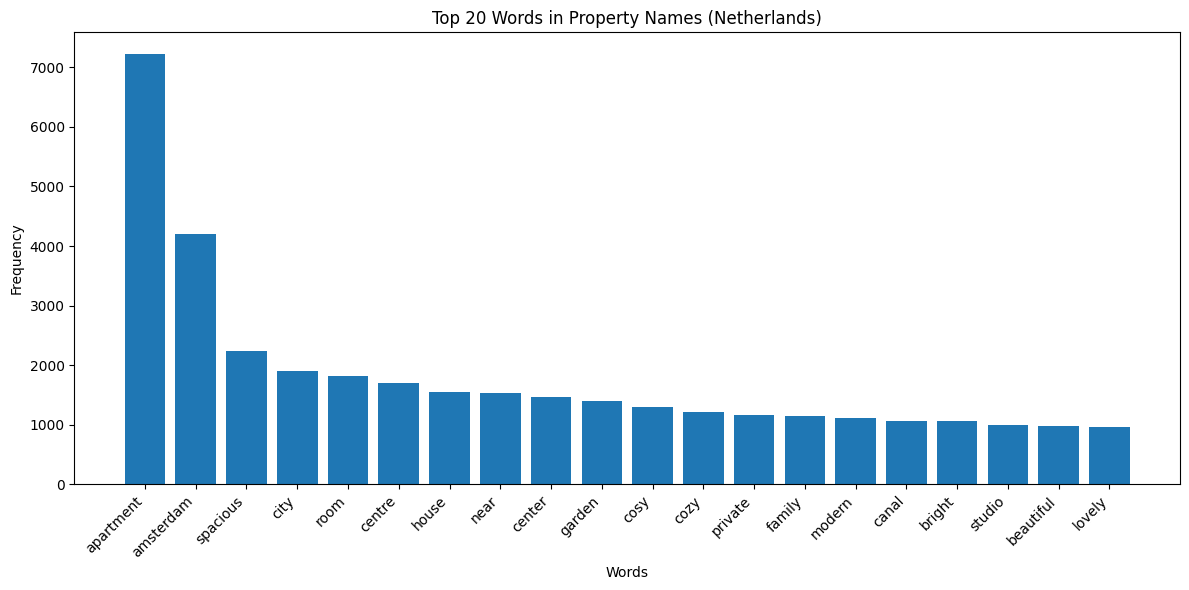

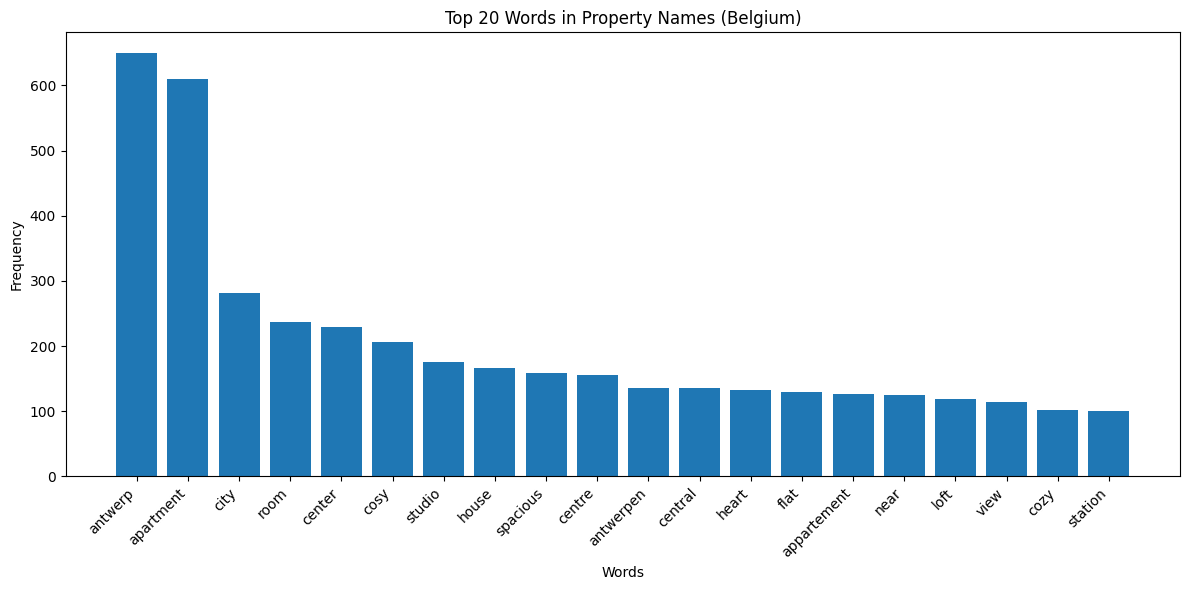

In [ ]:
import matplotlib.pyplot as plt

def plot_top_words(top_words, title):
  """Plots the top words and their frequencies."""
  words = [word for word, count in top_words]
  counts = [count for word, count in top_words]

  plt.figure(figsize=(12, 6))
  plt.bar(words, counts)
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  plt.title(title)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

# Plot top words for Netherlands
plot_top_words(top_words_netherlands, "Top 20 Words in Property Names (Netherlands)")

# Plot top words for Belgium
plot_top_words(top_words_belgium, "Top 20 Words in Property Names (Belgium)")


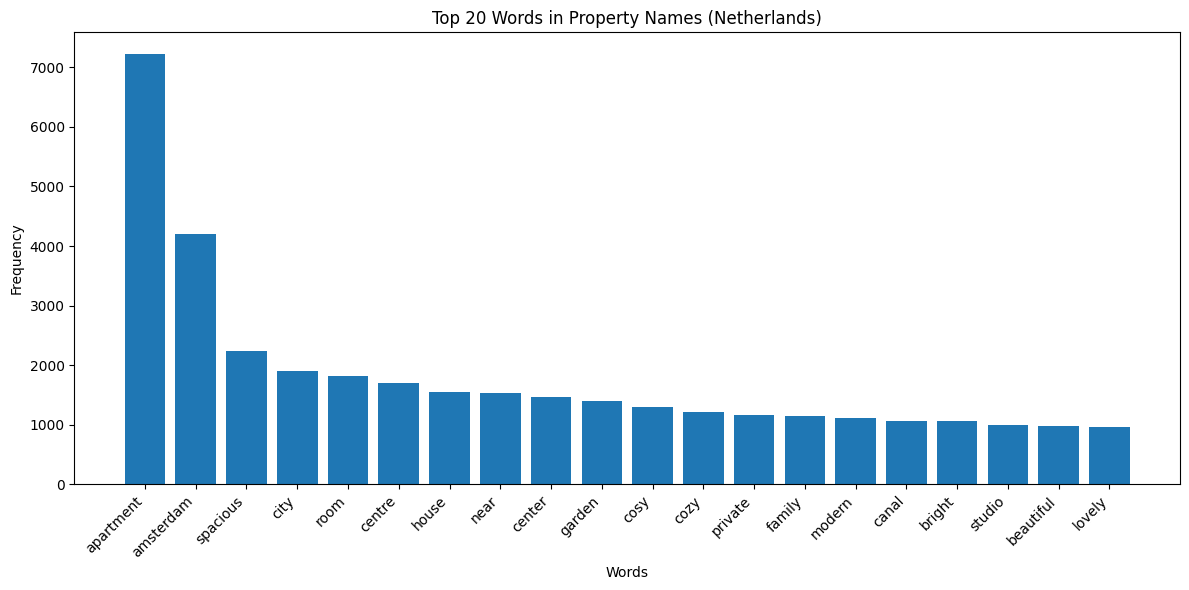

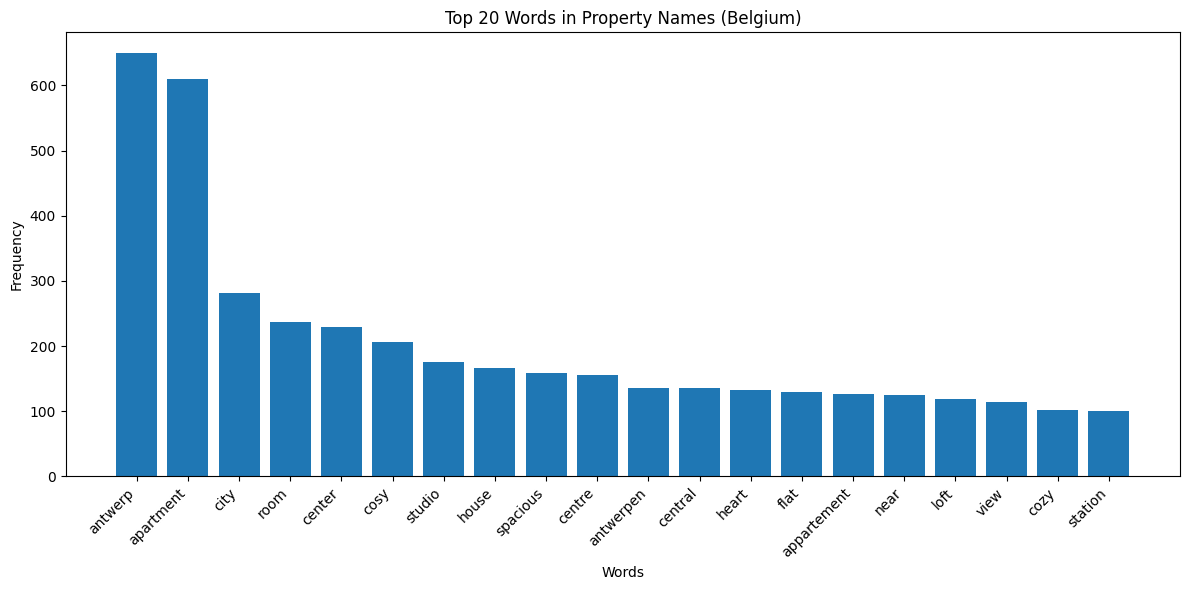

In [ ]:
import matplotlib.pyplot as plt

def plot_top_words(top_words, title):
  """Plots the top words and their frequencies."""
  words = [word for word, count in top_words]
  counts = [count for word, count in top_words]

  plt.figure(figsize=(12, 6))
  plt.bar(words, counts)
  plt.xlabel("Words")
  plt.ylabel("Frequency")
  plt.title(title)
  plt.xticks(rotation=45, ha='right')
  plt.tight_layout()
  plt.show()

# Plot top words for Netherlands
plot_top_words(top_words_netherlands, "Top 20 Words in Property Names (Netherlands)")

# Plot top words for Belgium
plot_top_words(top_words_belgium, "Top 20 Words in Property Names (Belgium)")


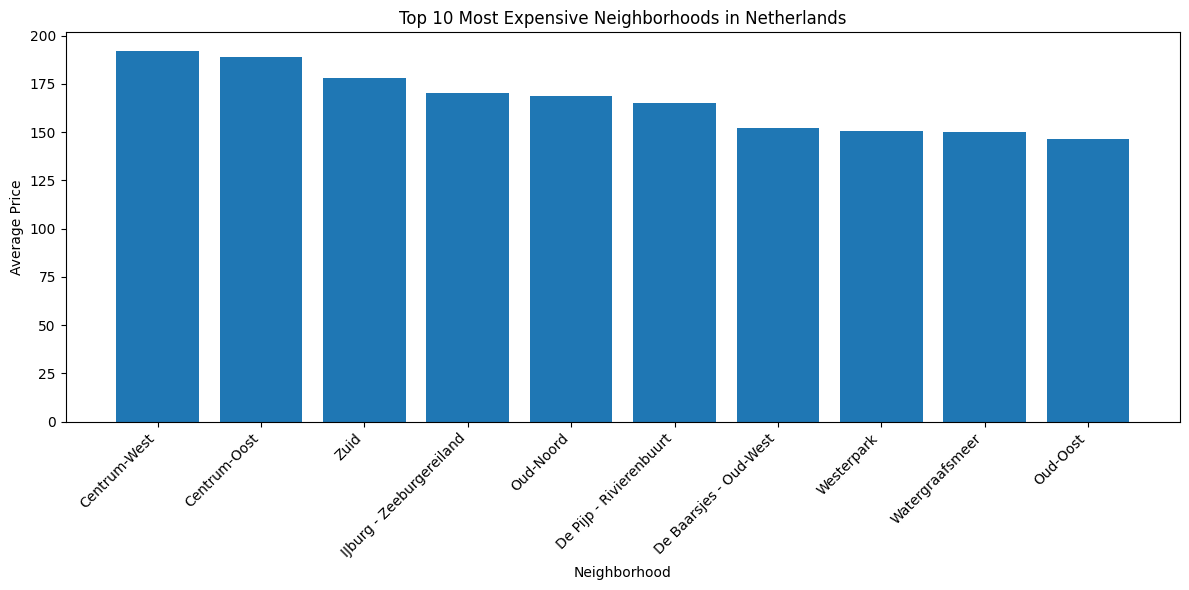

In [ ]:
import matplotlib.pyplot as plt
# Filter the DataFrame for Netherlands (country code 1)
netherlands_df = df[df['country'] == 1]

# Group by neighborhood and calculate the average price
average_price_by_neighborhood = netherlands_df.groupby('neighbourhood')['price'].mean()

# Sort the neighborhoods by average price in descending order
top_10_expensive_neighborhoods = average_price_by_neighborhood.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_expensive_neighborhoods.index, top_10_expensive_neighborhoods.values)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 10 Most Expensive Neighborhoods in Netherlands')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


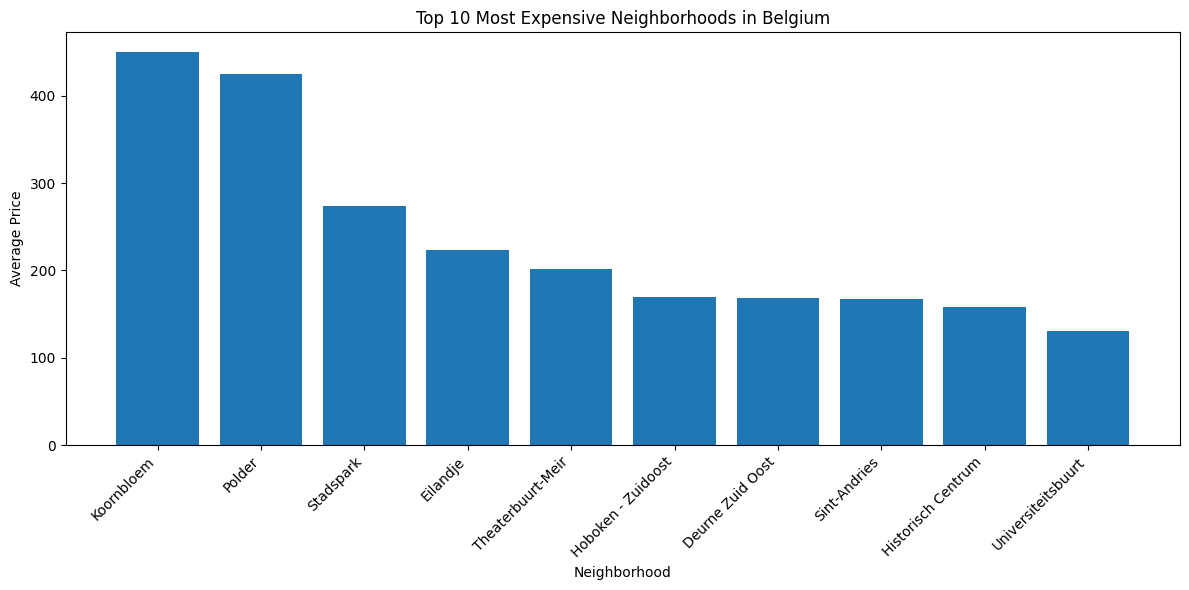

In [ ]:
import matplotlib.pyplot as plt
# Filter the DataFrame for Netherlands (country code 1)
belgium_df = df[df['country'] == 2]

# Group by neighborhood and calculate the average price
average_price_by_neighborhood = belgium_df.groupby('neighbourhood')['price'].mean()

# Sort the neighborhoods by average price in descending order
top_10_expensive_neighborhoods = average_price_by_neighborhood.sort_values(ascending=False).head(10)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_10_expensive_neighborhoods.index, top_10_expensive_neighborhoods.values)
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.title('Top 10 Most Expensive Neighborhoods in Belgium')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [ ]:
# Assuming a higher availability_365 indicates a higher likelihood of instant booking.
# You can adjust the threshold based on your understanding of the data.

# Define a threshold for availability_365 to consider a property as potentially instant bookable
availability_threshold = 300  # Example: Properties available for more than 300 days might be considered instant bookable

# Filter the DataFrame to include only properties with availability_365 above the threshold
potentially_instant_bookable_df = df[df['availability_365'] >= availability_threshold]

# Group by neighborhood and count the number of potentially instant bookable properties
instant_bookable_neighborhoods = potentially_instant_bookable_df.groupby('neighbourhood').size().reset_index(name='count')

# Sort by the count in descending order to see the neighborhoods with the most potentially instant bookable properties
instant_bookable_neighborhoods = instant_bookable_neighborhoods.sort_values('count', ascending=False)

print("Neighborhoods with potentially instant bookable properties:")
print(instant_bookable_neighborhoods)


Neighborhoods with potentially instant bookable properties:
              neighbourhood  count
11             Centrum-West    335
10             Centrum-Oost    227
14   De Baarsjes - Oud-West    197
15  De Pijp - Rivierenbuurt    163
63                     Zuid    144
..                      ...    ...
56     Tentoonstellingswijk      1
16  Deurne Dorp - Gallifort      1
19        Deurne Vlieghaven      1
50         Petroleum - Zuid      1
32       Hoboken - Zuidoost      1

[65 rows x 2 columns]


In [ ]:
# Step 1: Filter properties with high availability (e.g., more than 300 days)
high_availability_df = df[df['availability_365'] > 300]

# Step 2: Group by neighbourhood and count the number of high-availability properties
neighbourhood_counts = high_availability_df.groupby('neighbourhood')['availability_365'].count().reset_index()

# Step 3: Sort by count to find top neighborhoods
top_neighbourhoods = neighbourhood_counts.sort_values(by='availability_365', ascending=False).head(10)

# Step 4: Rename columns for better readability
top_neighbourhoods.columns = ['neighbourhood', 'high_availability_count']

# Display the top 10 instant bookable neighborhoods
print("Top 10 instant bookable neighborhoods (based on availability):")
print(top_neighbourhoods)

Top 10 instant bookable neighborhoods (based on availability):
                             neighbourhood  high_availability_count
11                            Centrum-West                      330
10                            Centrum-Oost                      224
14                  De Baarsjes - Oud-West                      197
15                 De Pijp - Rivierenbuurt                      163
63                                    Zuid                      143
61                              Westerpark                      107
29                      Historisch Centrum                       83
48                               Oud-Noord                       68
49                                Oud-Oost                       68
43  Oostelijk Havengebied - Indische Buurt                       63


In [ ]:

import plotly.express as px

# Assuming 'top_neighbourhoods' DataFrame is already created and contains 'neighbourhood' and 'high_availability_count'

# Create a bubble plot
fig = px.scatter(top_neighbourhoods, x='neighbourhood', y='high_availability_count', size='high_availability_count',
                 hover_name='neighbourhood', title='Top 10 Instant Bookable Neighborhoods',
                 labels={'neighbourhood': 'Neighborhood', 'high_availability_count': 'Number of Properties'})

# Customize the plot (optional)
fig.update_layout(xaxis_tickangle=-45)  # Rotate x-axis labels for better readability

# Show the plot
fig.show()

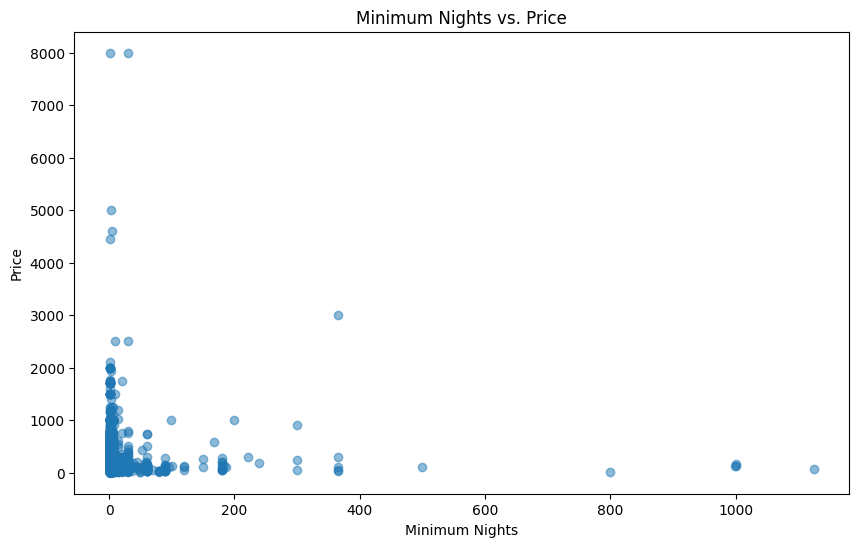

In [ ]:
import matplotlib.pyplot as plt

# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['minimum_nights'], df['price'], alpha=0.5)  # Adjust alpha for transparency

# Add labels and title
plt.xlabel('Minimum Nights')
plt.ylabel('Price')
plt.title('Minimum Nights vs. Price')

# Show the plot
plt.show()


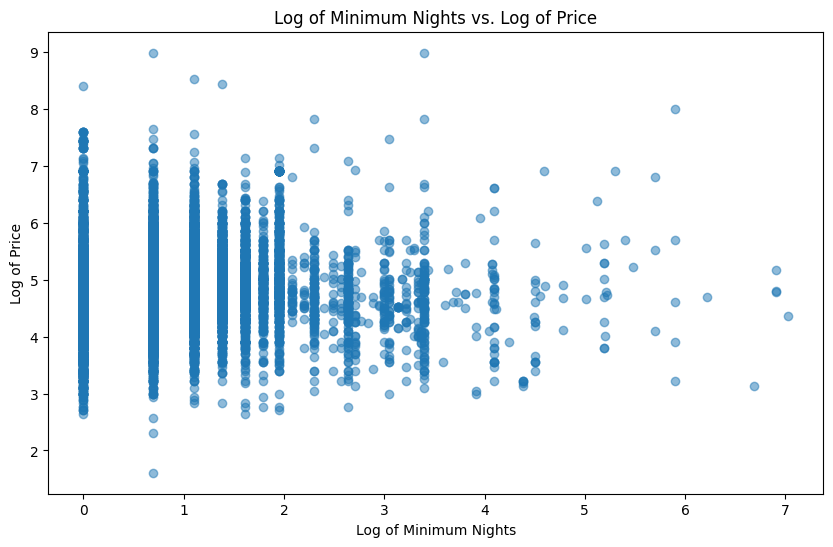

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
# Create a scatter plot with log transformation of both axes
plt.figure(figsize=(10, 6))
plt.scatter(np.log(df['minimum_nights']), np.log(df['price']), alpha=0.5)  # Adjust alpha for transparency

# Add labels and title
plt.xlabel('Log of Minimum Nights')
plt.ylabel('Log of Price')
plt.title('Log of Minimum Nights vs. Log of Price')

# Show the plot
plt.show()


In [ ]:
import numpy as np
# Remove rows with invalid values (e.g., minimum_nights or price <= 0)
df_valid = df[(df['minimum_nights'] > 0) & (df['price'] > 0)]

# Calculate the correlation between the log-transformed variables
correlation = np.corrcoef(np.log(df_valid['minimum_nights']), np.log(df_valid['price']))[0, 1]

print(f"Correlation between log(minimum_nights) and log(price): {correlation}")


Correlation between log(minimum_nights) and log(price): 0.10112488380469661


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21370 entries, 0 to 21370
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21370 non-null  int64  
 1   name                            21370 non-null  object 
 2   host_id                         21370 non-null  int64  
 3   country                         21370 non-null  int64  
 4   neighbourhood                   21370 non-null  object 
 5   latitude                        21370 non-null  float64
 6   longitude                       21370 non-null  float64
 7   price                           21370 non-null  int64  
 8   minimum_nights                  21370 non-null  int64  
 9   number_of_reviews               21370 non-null  int64  
 10  reviews_per_month               21370 non-null  float64
 11  calculated_host_listings_count  21370 non-null  int64  
 12  availability_365                21370

In [ ]:
# Filter out rows where price is zero or negative
df = df[df['price'] > 0]

# Log-transform the price
df['log_price'] = np.log(df['price'])

# Create dummy variables for room type
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

# Ensure all numeric columns are correctly typed
df['minimum_nights'] = pd.to_numeric(df['minimum_nights'], errors='coerce')
df['calculated_host_listings_count'] = pd.to_numeric(df['calculated_host_listings_count'], errors='coerce')
df['availability_365'] = pd.to_numeric(df['availability_365'], errors='coerce')

# Define the independent variables
X = df[['minimum_nights', 'calculated_host_listings_count', 'availability_365', 'room_type_Private room']]
# Convert X to numeric types
X = X.apply(pd.to_numeric, errors='coerce')
X = sm.add_constant(X)  # Add a constant term for intercept

# Define the dependent variable (log-transformed price)
y = df['log_price']

# Build the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

KeyError: "None of [Index(['room_type'], dtype='object')] are in the [columns]"

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21371 entries, 0 to 21370
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              21371 non-null  int64  
 1   name                            21371 non-null  object 
 2   host_id                         21371 non-null  int64  
 3   country                         21371 non-null  int64  
 4   neighbourhood                   21371 non-null  object 
 5   latitude                        21371 non-null  object 
 6   longitude                       21371 non-null  object 
 7   room_type                       21371 non-null  object 
 8   price                           21371 non-null  int64  
 9   minimum_nights                  21371 non-null  int64  
 10  number_of_reviews               21371 non-null  int64  
 11  reviews_per_month               21371 non-null  float64
 12  calculated_host_listings_count  

In [ ]:
# Log-transform the price
df['log_price'] = np.log(df['price'])

# Create dummy variables for room type
df = pd.get_dummies(df, columns=['room_type'], drop_first=True)

# Define the independent variables
X = df[['minimum_nights', 'calculated_host_listings_count', 'availability_365', 'room_type_Private room']]
X = sm.add_constant(X)  # Add a constant term for intercept

# Define the dependent variable (log-transformed price)
y = df['log_price']

# Build the regression model
model = sm.OLS(y, X).fit()

# Print the summary of the regression model
print(model.summary())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21371 entries, 0 to 21370
Data columns (total 6 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   price                           21371 non-null  int64  
 1   minimum_nights                  21371 non-null  int64  
 2   number_of_reviews               21371 non-null  int64  
 3   reviews_per_month               21371 non-null  float64
 4   calculated_host_listings_count  21371 non-null  int64  
 5   availability_365                21371 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 1001.9 KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21371 entries, 0 to 21370
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   const                           21371 non-null  float64
 1   minimum_nights                  21371 non-null  in

/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:396: RuntimeWarning:

divide by zero encountered in log



ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).